<h1 align="center" style="font-size: 36px;">Project for Deep Learning</h1>
<h2 align="center">Food Image Classification</h2>
<h4 align="center">University of Milano-Bicocca</h4>
<h4 align="center">Data Science Master's Degree</h4>
<h4 align="center">Academic Year 2022-2023</h4>

## Team Members
- Matteo Corona - 838138
- Costanza Pagnin - 898306

## Introduction
<div style="text-align: justify;">
The purpose of the project is to build an algorithm able to correctly classify previously unseen images. Classification allows assigning input data into predefined categories or classes based on patterns and features extracted from the data.
</div>
    
## Dataset
<div style="text-align: justify;">
The dataset we worked on is called ExampleFoodImageDataset. It consists of 978 images belonging to 9 different classes, named:
</div>

- caesar_salad
- caprese_salad
- french_fries
- greek_salad
- hamburger
- hot_dog
- pizza
- sashimi
- sushi

<div style="text-align: justify;">
The data is split in the following way: 70% of the data is used to train the model, 20% of the data is used as the validation set, and the remainder is used to test the model performances.
</div>

## Model Architecture
<div style="text-align: justify;">
This project leverages the technique of "transfer learning". Transfer learning consist of using a pre-trained model, which has been trained on a large dataset for a specific task, as a starting point to solve a different but related task. This approach often saves time, computational resources, and data, making it a powerful and widely used strategy in various deep learning applications.
</div>

## Conclusions
<div style="text-align: justify;">
We trained and tested the classification algorithm obtaining an accuracy of 91.2%
</div>

## Table of Contents
<div style="text-align: justify;">
In order to facilitate readability, the code is divided into three sections:
</div>

- **section 1** contains the preliminary steps
    - **1.1** Importing the necessary libraries
    - **1.2** Splitting the dataset
    - **1.3** Data generation
    - **1.4** Equal class representation
- **section 2** contains the definition of the network architecture and model training
    - **2.0** Model from scratch
    - **2.1** Model architecture
    - **2.2** Fitting the model
- **section 3** contains the evaluation part
    - **3.1** Accuracy
    - **3.2** Confusion matrix
<br><br>

# Section 1
Now let's analyze the code. The project begins with some preliminary steps which include reading and preprocessing the images.

## 1.1 - Importing the necessary libraries

<div style="text-align: justify;">
Firstly it is necessary to import the basic libraries that will be used in the code
</div>

In [1]:
# Importing basic libraries
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

## 1.2 - Splitting the dataset

<div style="text-align: justify;">
We decided to split the dataset into three sets:
</div>

- the training set, which contains 70% of the whole dataset
- the validetion set, which contains 20% of the whole dataset
- the training set, which contains 10% of the whole dataset

<div style="text-align: justify;">
For convenience, this goal has been achieved by creating three different folders in the working directory.
</div>

In [2]:
# Importing needed libraries
import shutil
import random

# Set the main folder path and the percentage for training, validation, and test data
main_folder = "ExampleFoodImageDataset"
train_percentage = 0.7
val_percentage = 0.2
test_percentage = 0.1

# Create the train and test directories outside the main folder
output_dir = os.getcwd()
train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "val")
test_dir = os.path.join(output_dir, "test")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Loop through each label folder in the main folder
for label_folder in os.listdir(main_folder):
    label_path = os.path.join(main_folder, label_folder)

    # Skip non-directory entries
    if not os.path.isdir(label_path):
        continue

    # Get the list of images for the current label
    images = os.listdir(label_path)
    num_images = len(images)

    # Calculate the number of images for training, validation, and testing
    num_train_images = int(num_images * train_percentage)
    num_val_images = int(num_images * val_percentage)
    num_test_images = num_images - num_train_images - num_val_images

    # Shuffle the images to have a random split
    random.shuffle(images)

    # Copy images to the train directory
    for i, image in enumerate(images[:num_train_images]):
        src_path = os.path.join(label_path, image)
        dst_path = os.path.join(train_dir, label_folder, image)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

    # Copy images to the validation directory
    for i, image in enumerate(images[num_train_images:num_train_images + num_val_images]):
        src_path = os.path.join(label_path, image)
        dst_path = os.path.join(val_dir, label_folder, image)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

    # Copy images to the test directory
    for i, image in enumerate(images[num_train_images + num_val_images:]):
        src_path = os.path.join(label_path, image)
        dst_path = os.path.join(test_dir, label_folder, image)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

print("Data split into train, validation, and test sets successfully.")

Data split into train, validation, and test sets successfully.


Let's plot a sample from the training dataset in order to take a look at the available data.

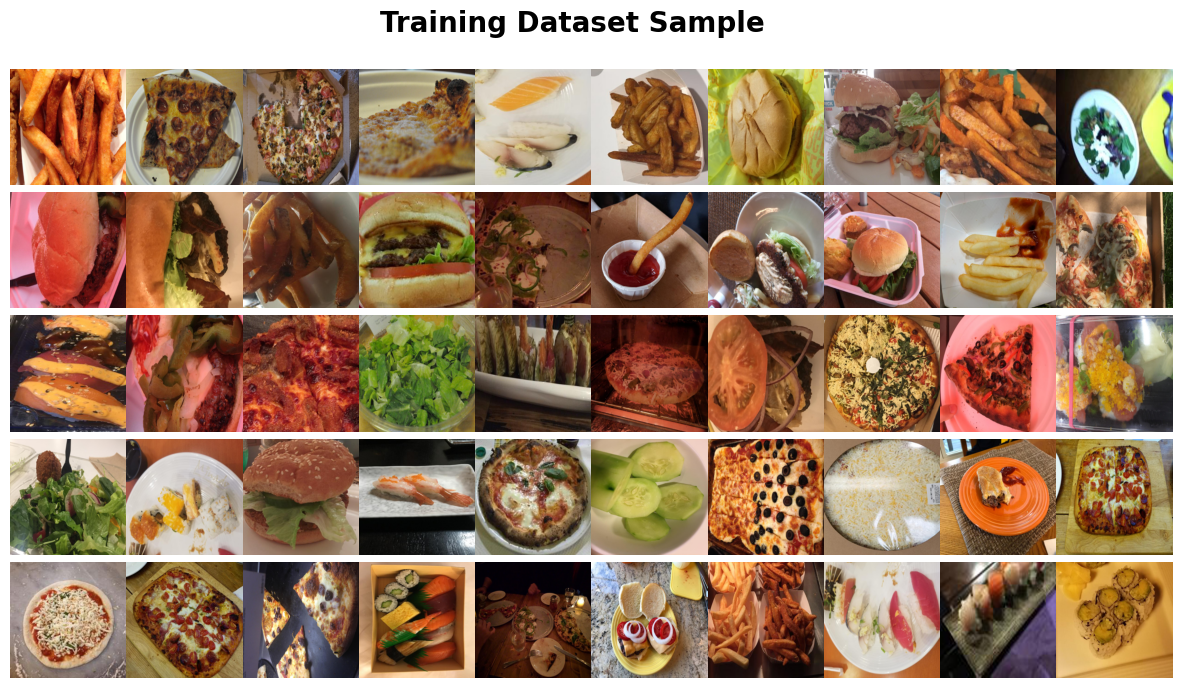

In [3]:
# Import needed libraries
from PIL import Image
import matplotlib.pyplot as plt

# Set the number of images to display in the grid
num_images_to_display = 50

# Get a list of all image paths in the training directory
all_image_paths = []
for label_folder in os.listdir(train_dir):
    label_path = os.path.join(train_dir, label_folder)
    if not os.path.isdir(label_path):
        continue

    images = os.listdir(label_path)
    all_image_paths.extend([os.path.join(label_path, image) for image in images])

# Randomly shuffle the list of image paths to get a random selection
random.shuffle(all_image_paths)

# Create a figure and axes for the grid
rows = 5  # Number of rows in the grid
cols = 10  # Number of columns in the grid
fig, axes = plt.subplots(rows, cols, figsize=(15, 8))

# Loop through the selected image paths and display images in the grid
for i, image_path in enumerate(all_image_paths[:num_images_to_display]):
    row = i // cols  # Calculate the row index for the current image
    col = i % cols  # Calculate the column index for the current image

    # Open the image using PIL
    image = Image.open(image_path)
    # Resize images to the desired dimensions (in this case, 224x224)
    image = image.resize((224, 224))
    
    # Display the image in the corresponding subplot
    axes[row, col].imshow(image)
    axes[row, col].axis('off')  # Remove axis ticks and labels for cleaner visualization

# Remove spacing between subplots to avoid overlapping
plt.subplots_adjust(wspace=0, hspace=0)  

# Add a big title to the entire grid
title = "Training Dataset Sample"
fig.suptitle(title, fontsize=20, y=0.95, weight='bold')

# Show the grid of images
plt.show()

## 1.3 - Data generation

<div style="text-align: justify;">
This code sets up data generators to process images for training, validation, and testing. Generators are functions or objects in Python that allow to generate values on-the-fly, one at a time, instead of loading all values into memory at once. This process helps lowering the computational cost and the execution time of an algorithm. The ImageDataGenerator class from TensorFlow's Keras is used to perform data augmentation and preprocessing. Data augmentation exploits techniques such as rescaling, random shear, random zoom, and horizontal flipping in order to prevent overfitting.
</div>
<br>
<div style="text-align: justify;">
The three sets are generated using the "flow_from_directory" method, which generates batches of preprocessed images along with their corresponding one-hot encoded labels (categorical labels) following the instructions defined in the relative ImageDataGenerator object.
</div>

In [4]:
# Importing needed libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Number of classes in the dataset
n_classes = 9
# Batch size for training and validation data
batch_size = 32
# Defining image dimensions
img_width, img_height = 224, 224
# Directory containing the training data
train_dir = 'train'
# Directory containing the validation data
val_dir = 'val'
# Directory containing the test data
test_dir = 'test'

# Data Augmentation with ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,             # Rescale the pixel values to the range [0, 1]
    shear_range=0.2,              # Apply random shear transformation
    zoom_range=0.2,               # Apply random zoom transformation
    horizontal_flip=True,         # Flip images horizontally at random
    rotation_range=20,            # Rotate images up to 20 degrees
    vertical_flip=True)           # Flip images vertically at random

# Creating a generator for training data
train_generator = train_datagen.flow_from_directory(
    train_dir,                           # folder directory
    target_size=(img_height, img_width), # image size
    batch_size=batch_size,               # batch size
    class_mode='categorical')            # one-hot encoded labels

# Data Preprocessing for validation data (only rescaling, no augmentation)
val_datagen = ImageDataGenerator(rescale=1. / 255)

# Creating a generator for validation data
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical') 

# Data Preprocessing for test data (only rescaling, no augmentation)
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Creating a generator for test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)   # Preserve the order of data

Found 978 images belonging to 9 classes.
Found 760 images belonging to 9 classes.
Found 543 images belonging to 9 classes.


Let's now see an example of data augmentation by selecting a single image and plotting all the relative augmented images.

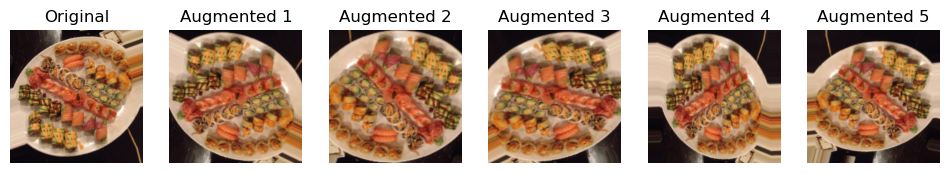

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Choose an index for the image you want to augment (e.g., 0 for the first image)
image_index = 6

# Select the chosen image from the training data
chosen_image = train_generator[0][0][image_index]

# Function to plot augmented images
def plot_augmented_images(image, num_augmentations=5):
    plt.figure(figsize=(12, 8))
    
    # Plot the original image
    plt.subplot(1, num_augmentations + 1, 1)
    plt.imshow(image)
    plt.title("Original")
    plt.axis('off')
    
    # Generate and plot augmented versions of the image
    for i in range(num_augmentations):
        augmented_img = train_datagen.random_transform(image)
        plt.subplot(1, num_augmentations + 1, i + 2)
        plt.imshow(augmented_img)
        plt.title(f"Augmented {i + 1}")
        plt.axis('off')
    
    plt.show()

# Plot augmented versions of the chosen image
plot_augmented_images(chosen_image)

## 1.4 - Equal class representation

<div style="text-align: justify;">
The problem of class imbalance occurs when there is a significant disparity in the number of samples among different classes in a dataset. In our case we noticed that some classes have much fewer instances (minority class) compared to other classes (majority class). Class imbalance can adversely affect the performance of the model so we decided to implement a strategy that ensure equal class representation.
</div>
<div style="text-align: justify;">    
By achieving equal class representation the model is less likely to be biased towards the majority class and it's better able to generalize to the minority classes. We implemented an oversampling technique using synthetic data generation methods from SMOTE (Synthetic Minority Over-sampling Technique)
</div>
<br>
<div style="text-align: justify;">    
For the oversampling to be applied we implemented this strategy:
</div>

- The image data and their corresponding binary labels are collected from the train_generator. The data is obtained in batches, and the images are stored in the X_train list, while the binary labels are stored in the y_train_binary list
- The image batches are concatenated into one array (X_train_reshaped) and reshaped into a 2D array suitable for SMOTE
- An instance of SMOTE (smote) is created with sampling_strategy='auto' to automatically balance the classes and random_state=42 to ensure reproducibility. SMOTE is applied to the training data (X_train_reshaped and y_train_binary) using the fit_resample method. This creates synthetic samples for the minority classes, effectively oversampling them and balancing the class distribution
- The input images are reshaped back to their original shape (3D) by converting X_resampled to the shape (num_samples, img_height, img_width, 3). The binary labels (y_resampled) are converted back to categorical labels using keras.utils.to_categorical
- A new generator function (oversampled_generator) is defined

In [6]:
# Importing needed libraries
from imblearn.over_sampling import SMOTE

# Collect all the image data and their corresponding binary labels from the generator
X_train = []
y_train_binary = []
for _ in range(len(train_generator)):
    X_batch, y_batch = train_generator.next()
    X_train.append(X_batch)
    y_train_binary.extend(np.argmax(y_batch, axis=1))

# Concatenate the batches into one array and reshape into 2D
X_train_reshaped = np.concatenate(X_train, axis=0)
X_train_reshaped = X_train_reshaped.reshape((-1, img_height * img_width * 3))

# Create an instance of SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to obtain the oversampled data
X_resampled, y_resampled = smote.fit_resample(X_train_reshaped, y_train_binary)

# Reshape the input images back to their original shape
X_resampled = X_resampled.reshape((-1, img_height, img_width, 3))

# Convert the binary labels back to categorical labels
y_resampled_categorical = keras.utils.to_categorical(y_resampled, num_classes=n_classes)

# Create a new generator using the oversampled data
def oversampled_generator(generator, X, y, batch_size):
    num_samples = X.shape[0]
    while True:
        indices = np.random.choice(num_samples, batch_size, replace=False)
        yield X[indices], y[indices]

# Use the oversampled_generator with the oversampled data
oversampled_train_generator = oversampled_generator(train_generator, X_resampled, y_resampled_categorical, batch_size)

The followng cell implement the generation of a bar plot that shows the different in class representation before and after the oversampling.

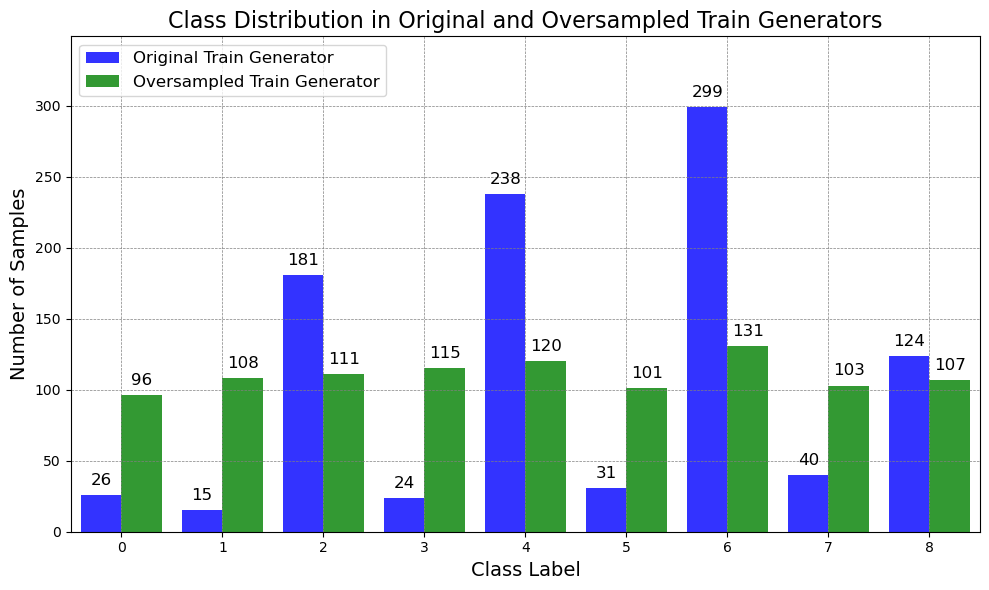

In [7]:
import numpy as np

# Collect all the binary labels from the original train_generator
y_train_binary_original = []
num_samples_original = 0
for data_batch, y_batch in train_generator:
    num_samples_original += len(y_batch)
    y_train_binary_original.extend(np.argmax(y_batch, axis=1))
    if num_samples_original >= len(train_generator.classes):
        break

# Count the occurrences of each class in the original train_generator
class_counts_original = np.bincount(y_train_binary_original)

# Collect all the binary labels from the oversampled_train_generator
y_train_binary_oversampled = []
num_samples_oversampled = 0
for data_batch, y_batch in oversampled_train_generator:
    num_samples_oversampled += len(y_batch)
    y_train_binary_oversampled.extend(np.argmax(y_batch, axis=1))
    if num_samples_oversampled >= len(train_generator.classes):  # Assuming batch_size is constant
        break

# Count the occurrences of each class in the oversampled_train_generator
class_counts_oversampled = np.bincount(y_train_binary_oversampled)

# Get the class labels for the plot
class_labels = np.arange(n_classes)

# Create a figure and a single subplot for the class distribution plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the class distribution in the original train_generator
ax.bar(class_labels - 0.2, class_counts_original, width=0.4, label='Original Train Generator', color='b', alpha=0.8)

# Plot the class distribution in the oversampled_train_generator
ax.bar(class_labels + 0.2, class_counts_oversampled, width=0.4, label='Oversampled Train Generator', color='g', alpha=0.8)

# Adding data labels on top of each bar
for i, count in enumerate(class_counts_original):
    ax.text(class_labels[i] - 0.2, count + 5, str(count), ha='center', va='bottom', fontsize=12, color='black')

for i, count in enumerate(class_counts_oversampled):
    ax.text(class_labels[i] + 0.2, count + 5, str(count), ha='center', va='bottom', fontsize=12, color='black')

# Customize the plot
ax.set_xlabel('Class Label', fontsize=14)
ax.set_ylabel('Number of Samples', fontsize=14)
ax.set_title('Class Distribution in Original and Oversampled Train Generators', fontsize=16)
ax.set_xticks(class_labels)
ax.legend(fontsize=12, loc='upper left')
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# Adjust spacing between bars and border of the plot
plt.xlim(-0.5, n_classes - 0.5)
plt.ylim(0, max(max(class_counts_original), max(class_counts_oversampled)) + 50)

# Adjust layout to prevent overlapping of labels
plt.tight_layout()

# Show the plot
plt.show()

# Section 2
Let's now analyse the structure of the model

## 2.0 - Model from scratch

Firstly we tried to build a model from scratch. This model consist of 7 layers:

- 4 convolutional layers with batch normalization
- 1 global average pooling layer
- 2 dense layers

In [8]:
# Importing needed libraries
from tensorflow.keras import regularizers
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Calculate the number of training and validation samples
nb_train_samples = len(train_generator.filenames)  # Number of training samples (size of the training dataset)
nb_validation_samples = len(val_generator.filenames)  # Number of validation samples (size of the validation dataset)

# Input layer
inputs = keras.Input((224, 224, 3))

# Convolutional layers
x = inputs
x = keras.layers.Conv2D(128, 3, padding="same", activation="relu", kernel_regularizer=regularizers.l2(0.01))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(256, 3, padding="same", activation="relu", kernel_regularizer=regularizers.l2(0.01))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D(2)(x)
x = keras.layers.Conv2D(512, 3, padding="same", activation="relu", kernel_regularizer=regularizers.l2(0.01))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(512, 3, padding="same", activation="relu", kernel_regularizer=regularizers.l2(0.01))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D(2)(x)

# Global average pooling
x = keras.layers.GlobalAveragePooling2D()(x)

# Dense layers
x = keras.layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(0.01))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.5)(x)

# Output layer
outputs = keras.layers.Dense(n_classes, activation="softmax")(x)

scratch = keras.Model(inputs, outputs)

# Compile the model
scratch.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9),  # Use Stochastic Gradient Descent optimizer with learning rate 0.0001 and momentum 0.9
              loss='categorical_crossentropy',  # Use categorical cross-entropy loss for multiclass classification
              metrics=['accuracy'])  # Monitor the accuracy metric during training

The `.fit()` method allows to train the model.

In [9]:
# Train the model using fit
history_scratch = scratch.fit(oversampled_train_generator,
                    steps_per_epoch=nb_train_samples // batch_size,
                    validation_data=val_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=20)

Epoch 1/20
30/30 [==============================] - 802s 27s/step - loss: 17.4929 - accuracy: 0.3938 - val_loss: 17.6877 - val_accuracy: 0.0380
Epoch 2/20
30/30 [==============================] - 798s 27s/step - loss: 17.0868 - accuracy: 0.5094 - val_loss: 17.7520 - val_accuracy: 0.0258
Epoch 3/20
30/30 [==============================] - 785s 26s/step - loss: 16.8877 - accuracy: 0.5281 - val_loss: 17.8223 - val_accuracy: 0.0272
Epoch 4/20
30/30 [==============================] - 783s 26s/step - loss: 16.6956 - accuracy: 0.5573 - val_loss: 17.8864 - val_accuracy: 0.0272
Epoch 5/20
30/30 [==============================] - 783s 26s/step - loss: 16.6637 - accuracy: 0.5396 - val_loss: 17.9946 - val_accuracy: 0.0177
Epoch 6/20
30/30 [==============================] - 781s 26s/step - loss: 16.5291 - accuracy: 0.6010 - val_loss: 18.2764 - val_accuracy: 0.0136
Epoch 7/20
30/30 [==============================] - 782s 26s/step - loss: 16.4670 - accuracy: 0.6240 - val_loss: 18.4286 - val_accuracy:

Based on the previus model we tried several combination of parameters and also modified the structure of the layers or changhing the dephth of the architecture but we only got a maximum of 40% accuracy in the validation set. For this reason we decided to completely change approach and make use of transfer learning.

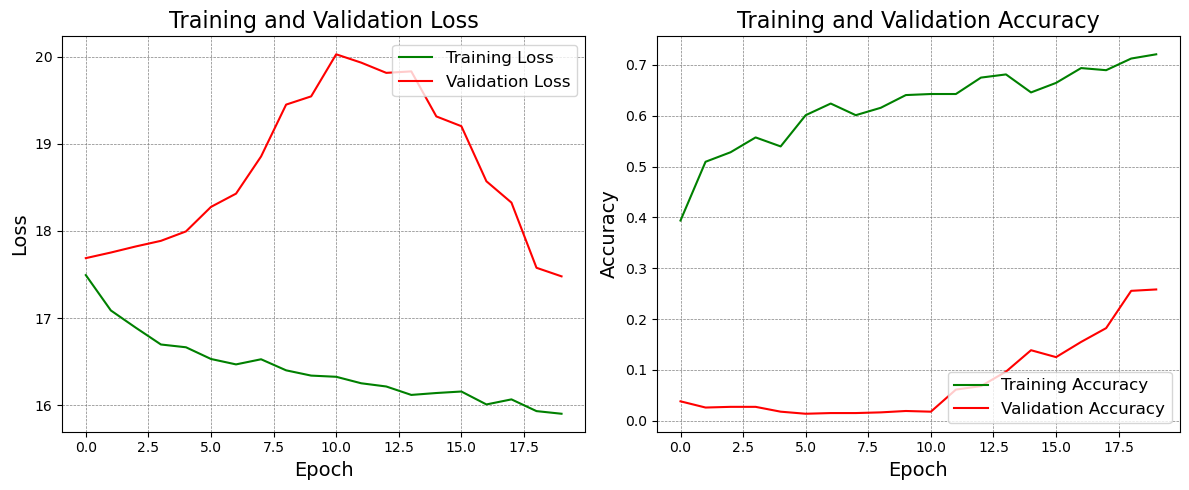

In [11]:
# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the loss
ax1.plot(history_scratch.history['loss'], label='Training Loss', color='green')
ax1.plot(history_scratch.history['val_loss'], label='Validation Loss', color='red')
ax1.set_xlabel('Epoch', fontsize=14)
ax1.set_ylabel('Loss', fontsize=14)
ax1.set_title('Training and Validation Loss', fontsize=16)
ax1.legend(loc='upper right', fontsize=12)
ax1.grid(color='gray', linestyle='--', linewidth=0.5)

# Plot the accuracy
ax2.plot(history_scratch.history['accuracy'], label='Training Accuracy', color='green')
ax2.plot(history_scratch.history['val_accuracy'], label='Validation Accuracy', color='red')
ax2.set_xlabel('Epoch', fontsize=14)
ax2.set_ylabel('Accuracy', fontsize=14)
ax2.set_title('Training and Validation Accuracy', fontsize=16)
ax2.legend(loc='lower right', fontsize=12)
ax2.grid(color='gray', linestyle='--', linewidth=0.5)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## 2.1 - Model architecture

<div style="text-align: justify;">
This code is creating and compiling a deep learning model for image classification using the InceptionV3 architecture as a base. It's using the TensorFlow Keras library to build the model.
InceptionV3 is a deep convolutional neural network architecture designed for image classification and object detection tasks. It is pre-trained on the large-scale ImageNet dataset, which contains millions of images from thousands of categories. This pre-training allows the model to learn rich feature representations from a large amount of diverse data and enables transfer learning for various downstream tasks.
<div><br>
<div style="text-align: justify;">
The first lines import various modules from TensorFlow Keras needed to create the model.
<div><br>    
<div style="text-align: justify;">
Subsequently, the number of training and validation samples are calculated, then we proceed to load the InceptionV3 model. The argument weights='imagenet' loads the pre-trained weights, and include_top=False means that the last fully connected layers (classification layers) of the InceptionV3 model are excluded and replaced by our own custom layers.
<div><br>
<div style="text-align: justify;">
"predictions" creates the final output layer with a Dense layer having n_classes neurons, which is the number of classes in the classification problem. It uses the softmax activation function, which produces probabilities for each class. 
The kernel_regularizer=regularizers.l2(0.005) adds L2 regularization to the kernel weights of the dense layer. By doing so, the model is encouraged to favor smaller weights of the dense layer, reducing the complexity of the model and helping to prevent overfitting, by adding a penalty term to the loss function based on the L2 norm of the weights. This can lead to improved generalization to new, unseen data during the training process.
<div><br>
<div style="text-align: justify;">
The final model is then created, by specifying the input and output layers. 'inception.input' is the input layer of the pre-trained InceptionV3 model, and 'predictions' is the output layer created in the previous step. 
<div><br>
<div style="text-align: justify;">
Finally, we compile the model with the following configurations:

- optimizer: Stochastic Gradient Descent (SGD) with a learning rate of 0.0001 and a momentum of 0.9 is used for optimization. Momentum allows the model to "remember" the previous gradients and keeps moving in the direction of the accumulated gradients, which helps to overcome obstacles like local minima and speed up the convergence to the best set of model parameters. SGD is a common optimizer used for training deep learning models.<br>
- loss: The categorical cross-entropy loss function is used, which is suitable for multi-class classification problems.<br>
- metrics: The model's performance during training will be evaluated using accuracy, which indicates the fraction of correctly classified samples
    
The model is now ready for training with the specified architecture, loss, optimizer, and evaluation metrics.
    
<div>

In [12]:
# Load the InceptionV3 model
inception = InceptionV3(weights='imagenet', include_top=False)  # Load InceptionV3 pre-trained on ImageNet without the top (classification) layer
x = inception.output  # Extract the output tensor of InceptionV3 model

x = GlobalAveragePooling2D()(x)  # Apply global average pooling to reduce spatial dimensions
x = Dense(128, activation='relu')(x)  # Add a fully connected layer with 128 units and ReLU activation
x = Dropout(0.2)(x)  # Apply dropout with a rate of 0.2 to reduce overfitting

# Create the output layer
predictions = Dense(n_classes, kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)
# Add a final fully connected layer with 'n_classes' units (output classes) and softmax activation for multiclass classification
# Apply L2 regularization with a coefficient of 0.005 to the kernel (weight) of this layer

# Create the final model
model = Model(inputs=inception.input, outputs=predictions)  # Combine the input and output layers to create the final model

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9),  # Use Stochastic Gradient Descent optimizer with learning rate 0.0001 and momentum 0.9
              loss='categorical_crossentropy',  # Use categorical cross-entropy loss for multiclass classification
              metrics=['accuracy'])  # Monitor the accuracy metric during training

## 2.2 - Fitting the model

Let's break down the `model.fit()` function step by step:

1. `model.fit()`:
This function is used to train a deep learning model. It takes the training data, validation data, and other training-related configurations as input and performs the training process.

2. `oversampled_train_generator`:
This is the data generator that provides batches of training samples to the model during training. The `oversampled_train_generator` contains the training images and their corresponding labels. The term "oversampled" suggests that the data generator used a technique to balance the class distribution, like duplicating or augmenting minority class samples.

3. `steps_per_epoch`:
This parameter specifies the number of steps (batches) that constitute one epoch during training. An epoch is one complete pass through the entire training dataset. In this case, `nb_train_samples // batch_size` calculates the number of steps per epoch by dividing the total number of training samples by the batch size used during training (`batch_size`).

4. `validation_data`:
This is the data used for model validation during training. It contains validation images and their corresponding labels. The model will be evaluated on this data after each epoch to monitor its performance.

5. `validation_steps`:
Similar to `steps_per_epoch`, `validation_steps` specifies the number of steps (batches) that constitute one epoch during validation. It is calculated using `nb_validation_samples // batch_size`, dividing the total number of validation samples (`nb_validation_samples`) by the batch size.

6. `epochs`:
This parameter defines the number of times the entire training dataset will be passed through the model during training. In this case, the model will be trained for 20 epochs, meaning it will see the entire training data 20 times.

7. `verbose`:
This parameter controls the amount of information displayed during training. Setting `verbose=1` means that progress bars and information about each epoch's training progress will be shown.

Putting it all together, the `model.fit()` function trains the deep learning model using the `oversampled_train_generator` data generator for 20 epochs. During each epoch, it processes batches of training data, and after each epoch, it evaluates the model's performance on the validation data. The progress and training information will be displayed due to the `verbose=1` setting. This process continues until all 20 epochs are completed, and the model's performance on the validation data is monitored throughout the training process.

In [13]:
# Train the model using fit
history = model.fit(oversampled_train_generator,
                    steps_per_epoch=nb_train_samples // batch_size,
                    validation_data=val_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=20)

Epoch 1/20
30/30 [==============================] - 100s 3s/step - loss: 2.3285 - accuracy: 0.1344 - val_loss: 2.0892 - val_accuracy: 0.2758
Epoch 2/20
30/30 [==============================] - 95s 3s/step - loss: 2.2061 - accuracy: 0.1802 - val_loss: 1.9925 - val_accuracy: 0.3003
Epoch 3/20
30/30 [==============================] - 95s 3s/step - loss: 2.0616 - accuracy: 0.2740 - val_loss: 1.8952 - val_accuracy: 0.3573
Epoch 4/20
30/30 [==============================] - 97s 3s/step - loss: 1.9260 - accuracy: 0.3792 - val_loss: 1.8154 - val_accuracy: 0.4266
Epoch 5/20
30/30 [==============================] - 96s 3s/step - loss: 1.8114 - accuracy: 0.4583 - val_loss: 1.7183 - val_accuracy: 0.5149
Epoch 6/20
30/30 [==============================] - 100s 3s/step - loss: 1.6815 - accuracy: 0.5583 - val_loss: 1.6361 - val_accuracy: 0.5774
Epoch 7/20
30/30 [==============================] - 106s 4s/step - loss: 1.5510 - accuracy: 0.6385 - val_loss: 1.5084 - val_accuracy: 0.6562
Epoch 8/20
30/30 

# Section 3
Now we can start with the evaluation part

## 3.1 - Accuracy

Based on the provided training and validation results, it appears that the model is gradually improving its performance as the number of epochs increases. Let's analyze the trends observed in the training and validation loss and accuracy:

1. *Training Loss and Accuracy*:
   - The training loss (represented by the "loss" value) steadily decreases as the number of epochs increases. This indicates that the model is getting better at minimizing the difference between its predictions and the actual labels on the training data.
   - The training accuracy (represented by the "accuracy" value) also increases over the epochs. This means the model is learning to classify the training data correctly with higher accuracy.

2. *Validation Loss and Accuracy*:
   - The validation loss (represented by the "val_loss" value) also steadily decreases over the epochs. This is a positive sign, indicating that the model is generalizing well and performing better on unseen validation data as it trains.
   - The validation accuracy (represented by the "val_accuracy" value) shows a consistent increase over the epochs, indicating the model is becoming more accurate in predicting the classes for the validation data.

3. *Overfitting Check*:
   - Overfitting occurs when the model performs very well on the training data but poorly on the validation data, suggesting it has memorized the training examples and struggles to generalize to new data. In this case, the increasing validation accuracy along with decreasing validation loss suggests that the model is not overfitting and is successfully generalizing to unseen data.

Overall, the training results indicate that the model is learning effectively and improving its performance as it trains. The validation results show that the model's performance on unseen data is also promising, and there is no sign of overfitting.

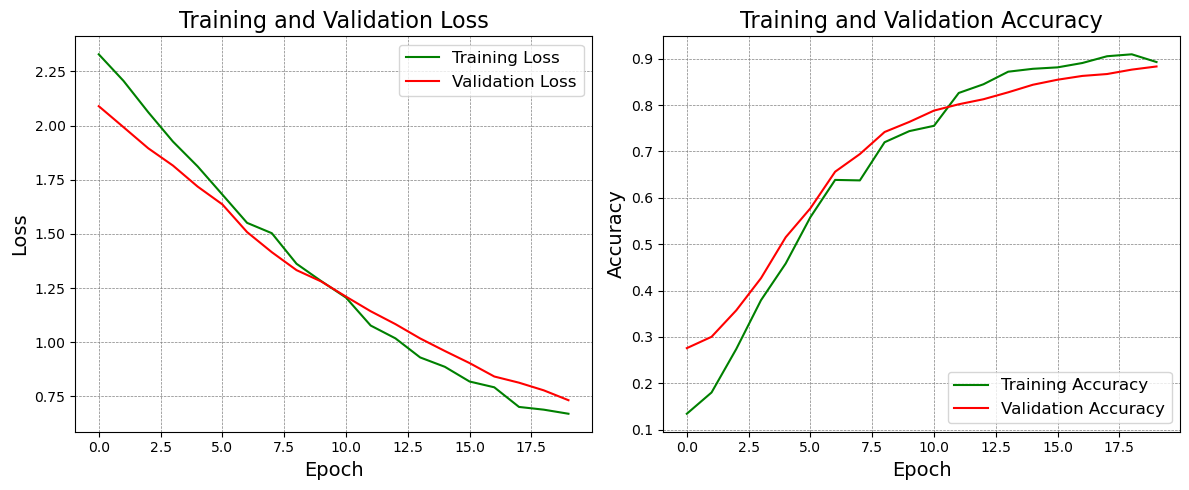

In [14]:
# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the loss
ax1.plot(history.history['loss'], label='Training Loss', color='green')
ax1.plot(history.history['val_loss'], label='Validation Loss', color='red')
ax1.set_xlabel('Epoch', fontsize=14)
ax1.set_ylabel('Loss', fontsize=14)
ax1.set_title('Training and Validation Loss', fontsize=16)
ax1.legend(loc='upper right', fontsize=12)
ax1.grid(color='gray', linestyle='--', linewidth=0.5)

# Plot the accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy', color='green')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
ax2.set_xlabel('Epoch', fontsize=14)
ax2.set_ylabel('Accuracy', fontsize=14)
ax2.set_title('Training and Validation Accuracy', fontsize=16)
ax2.legend(loc='lower right', fontsize=12)
ax2.grid(color='gray', linestyle='--', linewidth=0.5)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## 3.2 - Confusion matrix

In this final cell, we are evaluating the performance of the model. The goal is to understand how well the model is making predictions on unseen data.

Here's a simple explanation of what's happening:

1. *Model Evaluation*:
   - We first evaluate the trained model on the test dataset (`test_generator`) to measure its accuracy in making predictions on new, unseen food samples.
   - The evaluation gives us information about how well the model is performing in terms of both overall accuracy and loss (a measure of prediction error).

2. *Model Prediction and Class Labels*:
   - Next, we use the trained model to make predictions on the test dataset (`test_generator`).
   - The model predicts the probabilities for each food item belonging to different classes (e.g., salad, hamburger) based on its characteristics.
   - We then convert these predicted probabilities into predicted class labels (e.g., salad, hamburger) by choosing the class with the highest probability for each food item.

3. *True Labels and Confusion Matrix*:
   - The `test_generator` contains the true class labels for each food item in the test dataset.
   - We compare the true class labels from `test_generator` with the predicted class labels obtained from the model.
   - This comparison allows us to construct a "confusion matrix," which is a table showing how many food items were correctly classified and how many were misclassified for each class.

4. *Visualization with a Heatmap*:
   - We use the `seaborn` library to create a heatmap visualization of the confusion matrix.
   - The heatmap represents the performance of the model, with the rows and columns corresponding to the true class labels and predicted class labels, respectively.
   - Each cell in the heatmap represents the count of food items belonging to a specific class (true label) and predicted as another class (predicted label).
   - The color intensity in each cell indicates the number of food items in that category.

5. *Interpreting the Heatmap*:
   - The diagonal elements of the heatmap represent correct predictions, where the true class matches the predicted class.
   - Higher values along the diagonal indicate more accurate predictions for each class.
   - Off-diagonal elements represent misclassifications, showing which classes are often confused with each other.
   - The heatmap helps us understand the strengths and weaknesses of the model's performance for different food classes.

Overall, the heatmap provides a clear visual summary of how well the model is performing in classifying different food items. We can observe the model performs very well, in fact most evelements are correctly classified, as they are inserted in the main diagonal.

17/17 [==============================] - 8s 450ms/step


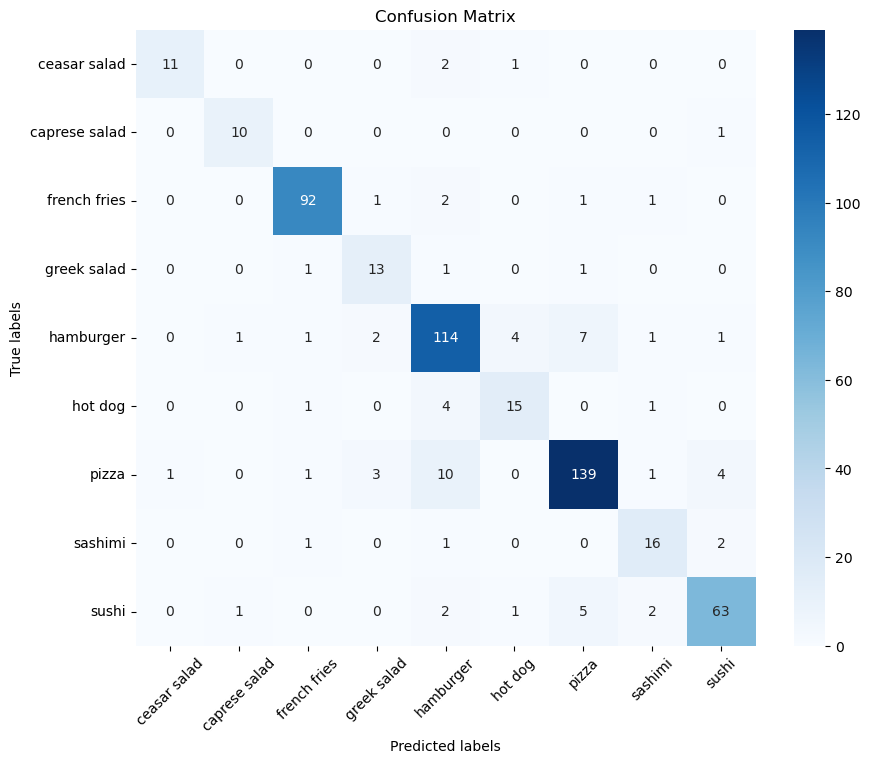

In [15]:
# Importing needed libraries
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Evaluate the model on the test data
model.evaluate(test_generator)

# Make predictions on the test data using the trained model
y_pred = model.predict(test_generator)

# Convert predicted probabilities to class labels (indices of the class with the highest probability)
predicted_labels = np.argmax(y_pred, axis=1)

# Get the true class labels for the test data
true_labels = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Your class labels (replace with your own labels if available)
class_labels = ['ceasar salad', 'caprese salad', 'french fries', 'greek salad', 'hamburger', 'hot dog', 'pizza', 'sashimi', 'sushi']

# Create a figure and axis for the heatmap
plt.figure(figsize=(10, 8))
ax = plt.gca()

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels, ax=ax)

# Add labels, title, and axis ticks to the plot
ax.set_xlabel('Predicted labels')  # x-axis label
ax.set_ylabel('True labels')  # y-axis label
ax.set_title('Confusion Matrix')  # title of the plot
ax.xaxis.set_ticklabels(class_labels, rotation=45)  # set the x-axis tick labels with class labels and rotate them by 45 degrees
ax.yaxis.set_ticklabels(class_labels, rotation=0)  # set the y-axis tick labels with class labels and keep them horizontally aligned

# Show the plot
plt.show()

In [16]:
from tensorflow.keras.utils import plot_model
# Save a visualization of the model to a file
plot_model(model, to_file='model_visualization.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [17]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Create the visualization of the model
plot_model(model, show_shapes=True, show_layer_names=True)

# Display the model architecture directly
plt.show()

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Saving the models

In [19]:
model.save('transfer_learning.keras')
scratch.save('model_from_scratch.keras')